# **Moniqo Group Project**

### Setup

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


pd.set_option("display.max_columns", 100)

### Load Cleaned Dataset

In [2]:
# Load the main dataset 
df = pd.read_csv('data/cleaned_dataset.csv')

# Display the first few rows of the dataset 
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018


### Data Points

1. Clear date is set on disbursement and is based on the loan tenure dictated by the product

In [4]:
# Get loan tenure in weeks

df["loan_tenure_weeks"] = (
    df["Product"]
    .str.extract(r"(\d+)\s*week", expand=False)
    .astype(float)
)


In [5]:
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,5.0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,5.0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,5.0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,5.0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,5.0


### More data cleaning

In [6]:
# James: Convert date columns to datetime format for easier analysis

# BorrowDate:  MM/DD/YYYY (Keep dayfirst=False)
df["BorrowDate"] = pd.to_datetime(df["BorrowDate"], errors="coerce", dayfirst=False)

# problematic columns: Use format='mixed' to handle the mix of DD/MM/YYYY and YYYY-MM-DD
df["loan_repayment_first_payment"] = pd.to_datetime(df["loan_repayment_first_payment"], errors="coerce", dayfirst=True, format='mixed')
df["loan_repayment_last_payment"] = pd.to_datetime(df["loan_repayment_last_payment"], errors="coerce", dayfirst=True, format='mixed')

# ClearDate:  YYYY-MM-DD
df["ClearDate"] = pd.to_datetime(df["ClearDate"], errors="coerce", format="%Y-%m-%d")

# Check the result
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,5.0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,5.0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,5.0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,5.0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,5.0


In [7]:
# James: More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.

df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

In [8]:
# More data cleaning 
# A customer cannot make a repayment 100 days BEFORE they borrowed the money.
# We allow a small buffer (-10 days) for potential booking errors, but anything less is garbage.
df['days_to_first'] = (df['loan_repayment_first_payment'] - df['BorrowDate']).dt.days
df = df[(df['days_to_first'] >= -10) | (df['days_to_first'].isna())].copy()

# The data logs the same loan twice. We keep only the first instance.
df = df.drop_duplicates(subset=['CustomerId', 'BorrowDate'], keep='first')

# A loan cannot be cleared BEFORE it was borrowed.
df = df[df['ClearDate'] >= df['BorrowDate']].copy()

# A business established in 2024 cannot borrow money in 2023.
df = df[df['YearEstablished'] <= df['BorrowDate'].dt.year].copy()

# Cleanup to remove Product types (sme - 3 months, sme - 4 months and 12 weeks credit ease) fron the dataset
df = df[~df['Product'].isin(['sme - 3 months', 'sme - 4 months', '12 weeks credit ease'])]
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 0 to 3469
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        1565 non-null   int64         
 1   AmountDisbursed               1565 non-null   int64         
 2   Interest                      1565 non-null   int64         
 3   LoanBalance                   1565 non-null   float64       
 4   BorrowDate                    1565 non-null   datetime64[ns]
 5   Product                       1565 non-null   object        
 6   Branch                        1565 non-null   object        
 7   ClearDate                     1565 non-null   datetime64[ns]
 8   CustomerId                    1565 non-null   int64         
 9   Gender                        1565 non-null   object        
 10  LoanLimit                     1565 non-null   float64       
 11  CreditScore                   1565 

(1565, 23)

Number of defaulters: 133
Percentage of Defaults vs Non-Defaults:
 0    91.501597
1     8.498403
Name: proportion, dtype: float64


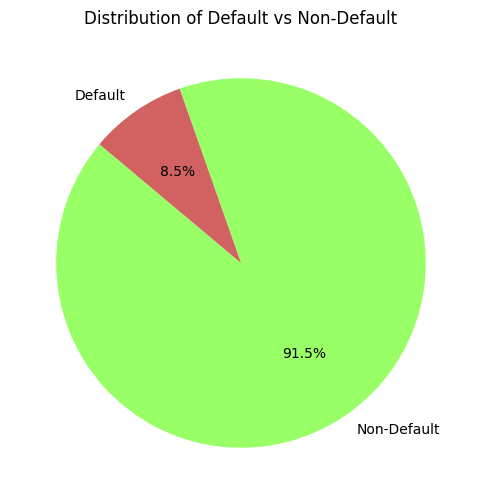

In [10]:
# Additional data cleaning

# James
# Understading the target variable Default where default is when ClearDate is greater than 2025-12-15 and LoanBalance is greater than 0
defaulters = ((df['ClearDate'] < '2025-12-15') & (df['LoanBalance'] > 0)).astype(int)
print("Number of defaulters:", defaulters.sum())

# Calculate the percentage of defaults vs non-defaults
default_counts = defaulters.value_counts(normalize=True) * 100
print("Percentage of Defaults vs Non-Defaults:\n", default_counts)

# Visualize the distribution of the target variable as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=["#99ff66","#d26161"])
plt.title('Distribution of Default vs Non-Default')
plt.show()

In [11]:
df.shape

(1565, 23)

In [14]:
CUTOFF_DATE = pd.Timestamp("2025-12-15")

df["isdefault"] = (
    (df["ClearDate"] < CUTOFF_DATE) &
    (df["LoanBalance"] > 0)
).astype(int)


In [17]:
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks,days_to_first,isdefault
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,5.0,0,0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,5.0,0,0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,5.0,0,0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,5.0,0,0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,5.0,0,0


In [18]:
# Time based features
df["days_since_disbursement"] = (
    CUTOFF_DATE - df["BorrowDate"]
).dt.days

df["contract_duration_days"] = (
    df["loan_tenure_weeks"] * 7
)

df["elapsed_contract_ratio"] = (
    df["days_since_disbursement"] /
    df["contract_duration_days"]
)

df["elapsed_contract_ratio"] = df["elapsed_contract_ratio"].clip(lower=0)


In [32]:
# Loan difficulty features
loanamount = df["AmountDisbursed"]+df["Interest"]
installmentamount = loanamount / df["loan_tenure_weeks"]


df["loanamount"] = (
    df["AmountDisbursed"]+df["Interest"]
    )

df["installmentamount"] = (
    df["loanamount"] / df["loan_tenure_weeks"]
    )

df["installment_to_loan_ratio"] = (
    installmentamount / loanamount
)

df["interest_burden"] = (
    df["Interest"] / loanamount
)

df["loan_to_limit_ratio"] = (
    loanamount / df["LoanLimit"]
)


In [22]:
# Borrowe experience features

df["loan_cycle_number"] = (
    df.groupby("CustomerId").cumcount() + 1
)

df["total_loans_completed"] = df["loan_cycle_number"] - 1


In [24]:
# Loan growth features

df["prev_loan_amount"] = (
    df.groupby("CustomerId")["loanamount"].shift(1)
)

df["loan_amount_growth"] = (
    df["loanamount"] / df["prev_loan_amount"]
)


In [29]:
# Handle loans with no previous loan history

# Flag: do we have previous loan info?
df["has_prev_loan"] = df["prev_loan_amount"].notna().astype(int)

# Neutral growth when missing
df["loan_amount_growth"] = df["loanamount"] / df["prev_loan_amount"]
df.loc[df["prev_loan_amount"].isna(), "loan_amount_growth"] = 1.0



In [30]:
df.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished,loan_tenure_weeks,days_to_first,isdefault,days_since_disbursement,contract_duration_days,elapsed_contract_ratio,installment_to_loan_ratio,interest_burden,loan_to_limit_ratio,loan_cycle_number,total_loans_completed,loanamount,prev_loan_amount,loan_amount_growth,has_prev_loan
0,951920,6000,1750,7750.0,2025-11-29,5 weeks credit ease,engineer,2026-03-01,1819,female,8000.0,3500,1,500,2025-11-29,2025-11-29,0,5.0,food & hospitality,green grocery (fruit/vegetables),2017,5.0,0,0,16,35.0,0.457143,0.2,0.225806,0.968750,1,0,7750,NaN,1.0,0
1,951902,4000,1250,5250.0,2025-11-28,5 weeks credit ease,molo,2026-02-01,1818,female,9600.0,2500,1,1550,2025-11-28,2025-11-28,0,4.0,food & hospitality,retail shop,2019,5.0,0,0,17,35.0,0.485714,0.2,0.238095,0.546875,1,0,5250,NaN,1.0,0
2,949962,4000,1250,5250.0,2025-11-26,5 weeks credit ease,engineer,2025-12-31,1815,female,8000.0,3500,1,1350,2025-11-26,2025-11-26,0,4.0,food & hospitality,green grocery (fruit/vegetables),2014,5.0,0,0,19,35.0,0.542857,0.2,0.238095,0.656250,1,0,5250,NaN,1.0,0
3,949189,4000,1250,5250.0,2025-11-25,5 weeks credit ease,molo,2025-12-30,1814,female,10000.0,1500,1,1000,2025-11-25,2025-11-25,0,4.0,food & hospitality,green grocery (fruit/vegetables),2018,5.0,0,0,20,35.0,0.571429,0.2,0.238095,0.525000,1,0,5250,NaN,1.0,0
4,948984,4000,1250,5250.0,2025-11-24,5 weeks credit ease,molo,2025-12-29,1813,female,10000.0,1500,1,1550,2025-11-24,2025-11-24,0,4.0,business & information,bureau & publishing services,2018,5.0,0,0,21,35.0,0.600000,0.2,0.238095,0.525000,1,0,5250,NaN,1.0,0


In [28]:
df["prev_loan_amount"].isna().sum()


np.int64(629)

### Feature selection

In [36]:
# Feature selection

NUM_FEATURES = [
    "loanamount",
    "installmentamount",
    "Interest",
    "LoanLimit",
    "loan_tenure_weeks",
    "days_since_disbursement",
    "contract_duration_days",
    "elapsed_contract_ratio",
    "installment_to_loan_ratio",
    "interest_burden",
    "loan_to_limit_ratio",
    "loan_cycle_number",
    "total_loans_completed",
    "loan_amount_growth",
    "has_prev_loan",              
]

CAT_FEATURES = [
    "Branch",
    "Gender",
]

TARGET_COL = "isdefault"

# SAFETY: KEEP ONLY COLUMNS THAT EXIST IN THE DATAFRAME
all_features = [c for c in (NUM_FEATURES + CAT_FEATURES) if c in df.columns]

missing = [c for c in (NUM_FEATURES + CAT_FEATURES + [TARGET_COL]) if c not in df.columns]
if missing:
    print("Missing columns (not selected):", missing)

# Build X, y
df_model = df.dropna(subset=[TARGET_COL]).copy()  
X = df_model[all_features].copy()
y = df_model[TARGET_COL].astype(int).copy()

print("X shape:", X.shape)
print("Selected features:", X.columns.tolist())
print("y default rate:", y.mean())

X shape: (1565, 17)
Selected features: ['loanamount', 'installmentamount', 'Interest', 'LoanLimit', 'loan_tenure_weeks', 'days_since_disbursement', 'contract_duration_days', 'elapsed_contract_ratio', 'installment_to_loan_ratio', 'interest_burden', 'loan_to_limit_ratio', 'loan_cycle_number', 'total_loans_completed', 'loan_amount_growth', 'has_prev_loan', 'Branch', 'Gender']
y default rate: 0.08498402555910543


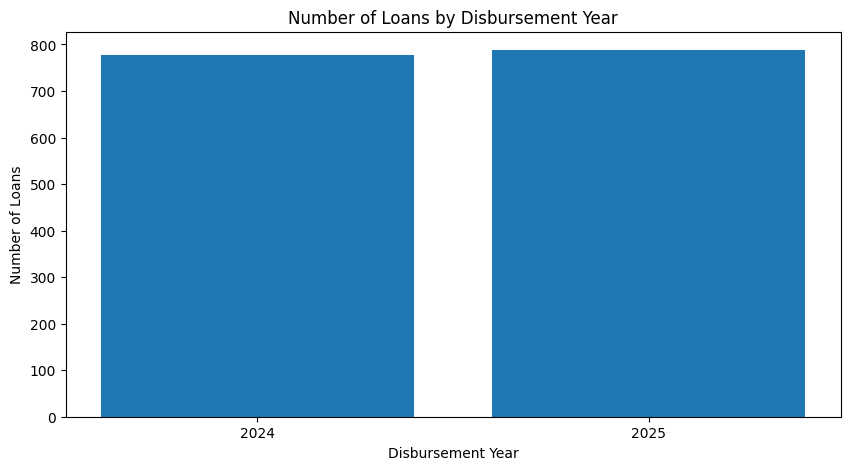

BorrowDate
2024    777
2025    788
Name: count, dtype: int64


In [37]:
DATE_COL = "BorrowDate"

# Ensure datetime
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

# Count loans by year
loans_by_year = (
    df.dropna(subset=[DATE_COL])[DATE_COL]
      .dt.year
      .value_counts()
      .sort_index()
)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(loans_by_year.index.astype(str), loans_by_year.values)
plt.title("Number of Loans by Disbursement Year")
plt.xlabel("Disbursement Year")
plt.ylabel("Number of Loans")
plt.xticks(rotation=0)
plt.show()

print(loans_by_year)

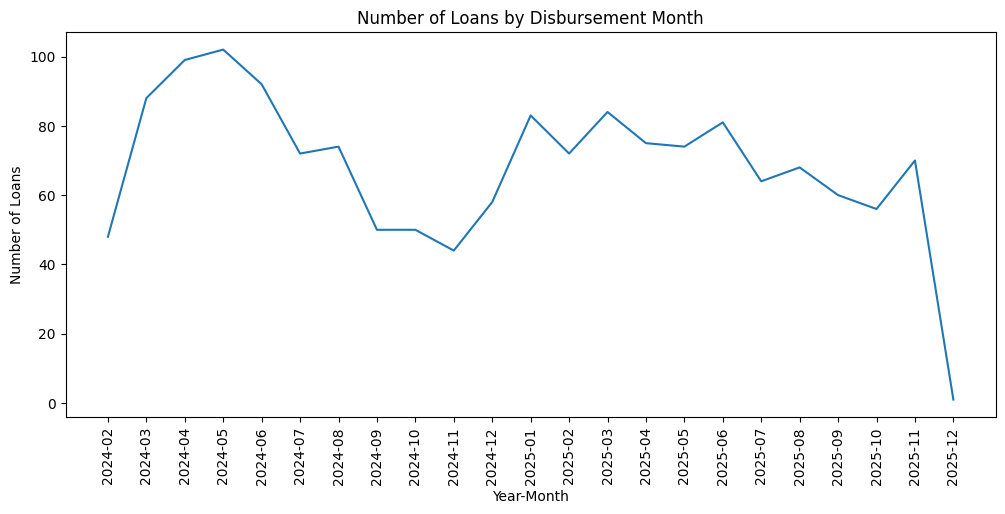

BorrowDate
2024-02     48
2024-03     88
2024-04     99
2024-05    102
2024-06     92
2024-07     72
2024-08     74
2024-09     50
2024-10     50
2024-11     44
2024-12     58
2025-01     83
2025-02     72
2025-03     84
2025-04     75
2025-05     74
2025-06     81
2025-07     64
2025-08     68
2025-09     60
2025-10     56
2025-11     70
2025-12      1
Freq: M, Name: count, dtype: int64


In [38]:
by_month = (
    df.dropna(subset=[DATE_COL])[DATE_COL]
      .dt.to_period("M")
      .value_counts()
      .sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(by_month.index.astype(str), by_month.values)
plt.title("Number of Loans by Disbursement Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Loans")
plt.xticks(rotation=90)
plt.show()

print(by_month.tail(24))


### Splitting by Date

#### Training: 
Feb 2024 to Feb 2025 (~65%)

#### Validation: 
Mar 2025 to May 2025 (~15%)

#### Testing:
Jun 2025 to Nov 2025 (~20%)

In [40]:

# Exclude incomplete last month (Dec 2025)
df = df[df["BorrowDate"] < "2025-12-01"].copy()

# Option B splits
train_df = df[df["BorrowDate"] < "2025-03-01"].copy()  # up to end of Feb 2025
val_df   = df[(df["BorrowDate"] >= "2025-03-01") & (df["BorrowDate"] < "2025-06-01")].copy()
test_df  = df[(df["BorrowDate"] >= "2025-06-01") & (df["BorrowDate"] < "2025-12-01")].copy()

print("Train:", train_df.shape, " | months:", train_df["BorrowDate"].dt.to_period("M").nunique())
print("Val:  ", val_df.shape,   " | months:", val_df["BorrowDate"].dt.to_period("M").nunique())
print("Test: ", test_df.shape,  " | months:", test_df["BorrowDate"].dt.to_period("M").nunique())

# If you've already built X (features) and y (target) earlier:
X_train, y_train = train_df[X.columns], train_df[y.name]
X_val, y_val     = val_df[X.columns],   val_df[y.name]
X_test, y_test   = test_df[X.columns],  test_df[y.name]

print("Default rates ->",
      "train:", y_train.mean().round(4),
      "val:", y_val.mean().round(4),
      "test:", y_test.mean().round(4))


Train: (932, 37)  | months: 13
Val:   (233, 37)  | months: 3
Test:  (399, 37)  | months: 6
Default rates -> train: 0.0612 val: 0.1159 test: 0.1228


In [41]:
# Pre training data check

print("Train default rate:", y_train.mean())
print("Val default rate:", y_val.mean())
print("Test default rate:", y_test.mean())

print("Train size:", X_train.shape)
print("Val size:", X_val.shape)
print("Test size:", X_test.shape)


Train default rate: 0.0611587982832618
Val default rate: 0.11587982832618025
Test default rate: 0.12280701754385964
Train size: (932, 17)
Val size: (233, 17)
Test size: (399, 17)


### Building the preprocessing pipeline

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [43]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, NUM_FEATURES),
        ("cat", categorical_transformer, CAT_FEATURES)
    ]
)


In [44]:
### Baseline training 

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report

log_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

log_model.fit(X_train, y_train)

val_proba = log_model.predict_proba(X_val)[:, 1]
print("Logistic VAL ROC-AUC:", roc_auc_score(y_val, val_proba))

val_pred = (val_proba >= 0.5).astype(int)
print(classification_report(y_val, val_pred))


Logistic VAL ROC-AUC: 0.8037576411362819
              precision    recall  f1-score   support

           0       0.96      0.61      0.75       206
           1       0.22      0.81      0.34        27

    accuracy                           0.64       233
   macro avg       0.59      0.71      0.54       233
weighted avg       0.88      0.64      0.70       233



In [48]:
import numpy as np
from sklearn.metrics import precision_recall_curve

probs = val_proba
precision, recall, thresholds = precision_recall_curve(y_val, probs)

pr_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

pr_df.sort_values("recall", ascending=False).head(10)


,threshold,precision,recall
0,0.000575,0.115880,1.0
44,0.075100,0.142857,1.0
65,0.103898,0.160714,1.0
64,0.102391,0.159763,1.0
63,0.099793,0.158824,1.0
62,0.098797,0.157895,1.0
61,0.097702,0.156977,1.0
60,0.096513,0.156069,1.0
58,0.093899,0.154286,1.0
57,0.093476,0.153409,1.0


In [50]:
# Filter to a sensible recall range
candidate_thresholds = pr_df[
    (pr_df["recall"] >= 0.65) & (pr_df["recall"] <= 0.80)
].sort_values("precision", ascending=False)

candidate_thresholds.head(10)


,threshold,precision,recall
159,0.650765,0.256757,0.703704
151,0.636221,0.256098,0.777778
158,0.648471,0.253333,0.703704
150,0.636208,0.253012,0.777778
149,0.630617,0.250000,0.777778
157,0.646254,0.250000,0.703704
161,0.651067,0.250000,0.666667
148,0.625112,0.247059,0.777778
152,0.639000,0.246914,0.740741
156,0.644327,0.246753,0.703704


In [51]:
CHOSEN_THRESHOLD = 0.636

val_pred_final = (val_proba >= CHOSEN_THRESHOLD).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred_final))


              precision    recall  f1-score   support

           0       0.96      0.70      0.81       206
           1       0.25      0.78      0.38        27

    accuracy                           0.71       233
   macro avg       0.61      0.74      0.60       233
weighted avg       0.88      0.71      0.76       233



In [52]:
test_proba = log_model.predict_proba(X_test)[:, 1]
test_pred_final = (test_proba >= CHOSEN_THRESHOLD).astype(int)

from sklearn.metrics import roc_auc_score, classification_report
print("TEST ROC–AUC:", roc_auc_score(y_test, test_proba))
print(classification_report(y_test, test_pred_final))


TEST ROC–AUC: 0.667871720116618
              precision    recall  f1-score   support

           0       0.96      0.47      0.63       350
           1       0.19      0.88      0.31        49

    accuracy                           0.52       399
   macro avg       0.58      0.67      0.47       399
weighted avg       0.87      0.52      0.59       399



In [49]:
# Sort by recall descending, then precision descending
pr_df_sorted = pr_df.sort_values(
    by=["recall", "precision"],
    ascending=[False, False]
)

# Look at reasonable recall range
pr_df_sorted[(pr_df_sorted["recall"] >= 0.65) & (pr_df_sorted["recall"] <= 0.80)].head(10)


,threshold,precision,recall
151,0.636221,0.256098,0.777778
150,0.636208,0.253012,0.777778
149,0.630617,0.250000,0.777778
148,0.625112,0.247059,0.777778
147,0.621048,0.244186,0.777778
146,0.619394,0.241379,0.777778
145,0.618759,0.238636,0.777778
144,0.612619,0.235955,0.777778
143,0.611127,0.233333,0.777778
142,0.610051,0.230769,0.777778


In [45]:
### Random Forest training

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        min_samples_leaf=5,
        min_samples_split=10,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_val_proba = rf_model.predict_proba(X_val)[:, 1]
print("RF VAL ROC-AUC:", roc_auc_score(y_val, rf_val_proba))


RF VAL ROC-AUC: 0.7543149946062567


In [46]:
best_model = rf_model  # or log_model if it performed better

test_proba = best_model.predict_proba(X_test)[:, 1]
print("TEST ROC-AUC:", roc_auc_score(y_test, test_proba))

test_pred = (test_proba >= 0.5).astype(int)
print(classification_report(y_test, test_pred))


TEST ROC-AUC: 0.6632361516034985
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       350
           1       0.17      0.31      0.22        49

    accuracy                           0.74       399
   macro avg       0.53      0.55      0.53       399
weighted avg       0.80      0.74      0.77       399

